## House  Price Prediction

## Problem Statement:

### * Websites like 99acres, commomfloor, magicbricks where properties are listed for sell/buy purpposes.

### * But there are lot of inconsistence in term of house pricing, like same type of house but different price

### * No way for user to know price of house which he is going to Sell/buy

## Objective:

### * To Build Trust and increase Transparency between Customers and Real Estate website, as Proper & Justified prices of Properties can help.

### * To build efficient model to predict accurate house price based on features.

In [1296]:
# PropTech for Proactive Pricing of Houses in Classified Advertisements in the Indian Real Estate Market Sayan Putatunda 
# https://arxiv.org/ftp/arxiv/papers/1904/1904.05328.pdf

### Importing Required Library

In [1300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1301]:
house = pd.read_csv(r'E:\Data Science\Praxis BS\Study Material\TERM 1\ML\Assignment\House_rent\wk3_kc_house_train_data.csv')

In [1302]:
house.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [1303]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


### To check missing value

In [1304]:
# There is no missing value
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Counting unique values of each variable 

In [1305]:
#
house.nunique(axis=0, dropna = False)

id               9720
date              357
price            2533
bedrooms           13
bathrooms          28
sqft_living       730
sqft_lot         5581
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        665
sqft_basement     251
yr_built          116
yr_renovated       65
zipcode            70
lat              4186
long              666
sqft_living15     588
sqft_lot15       5147
dtype: int64

## Transforming year built Column & Renovated Year column into Age

In [1306]:
# importing current time
from datetime import date

In [1307]:
# calculating age
house['age'] = (date.today().year - house['yr_built'])

In [1308]:
#Calculating Renovated AGe
house['renovated_age'] = (date.today().year - house['yr_renovated'][house.yr_renovated !=0])
house['renovated_age'] = house['renovated_age'].replace(np.NaN, 0)

In [1309]:
house.sort_values(['renovated_age','age'], ascending=[1,0])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated_age
228,9274202270,20140818T000000,625000.0,2,1.50,1490,5750,1.5,0,0,...,300,1900,0,98116,47.5872,-122.390,1590,4025,120,0.0
250,5694500105,20141204T000000,595000.0,2,2.00,1510,4000,1.0,0,0,...,500,1900,0,98103,47.6582,-122.345,1920,4000,120,0.0
439,2768301715,20150311T000000,565000.0,4,3.00,2020,4300,1.5,0,0,...,0,1900,0,98107,47.6653,-122.372,1290,3440,120,0.0
827,2264500890,20140508T000000,712000.0,3,1.00,1250,4620,1.5,0,0,...,100,1900,0,98103,47.6510,-122.341,1900,4400,120,0.0
932,2207500695,20150304T000000,1015000.0,4,2.50,2960,4760,2.0,0,0,...,800,1900,0,98102,47.6367,-122.318,1600,4760,120,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,4083800555,20150326T000000,550000.0,2,1.00,980,3080,1.5,0,0,...,0,1910,1946,98103,47.6646,-122.339,1450,3333,110,74.0
8821,3163600076,20140730T000000,152275.0,1,1.00,1020,6871,1.0,0,0,...,0,1937,1946,98146,47.5051,-122.338,1260,6933,83,74.0
7346,2374200005,20140616T000000,375000.0,4,2.00,2400,6000,2.0,0,0,...,0,1913,1945,98011,47.7607,-122.209,1780,8732,107,75.0
289,582000135,20140622T000000,565000.0,2,1.75,1330,6000,1.0,0,0,...,370,1914,1945,98199,47.6539,-122.396,1620,6000,106,75.0


In [1310]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated_age
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,...,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,...,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165,49.200492,1.057679
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,...,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402,29.240009,5.894344
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000,5.000000,0.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000,24.000000,0.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000,45.000000,0.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,...,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000,69.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000,120.000000,80.000000


# Univariate Analysis

## Bedrooms, Bathrooms, Floors, Waterfront, Views, Condition, Grade

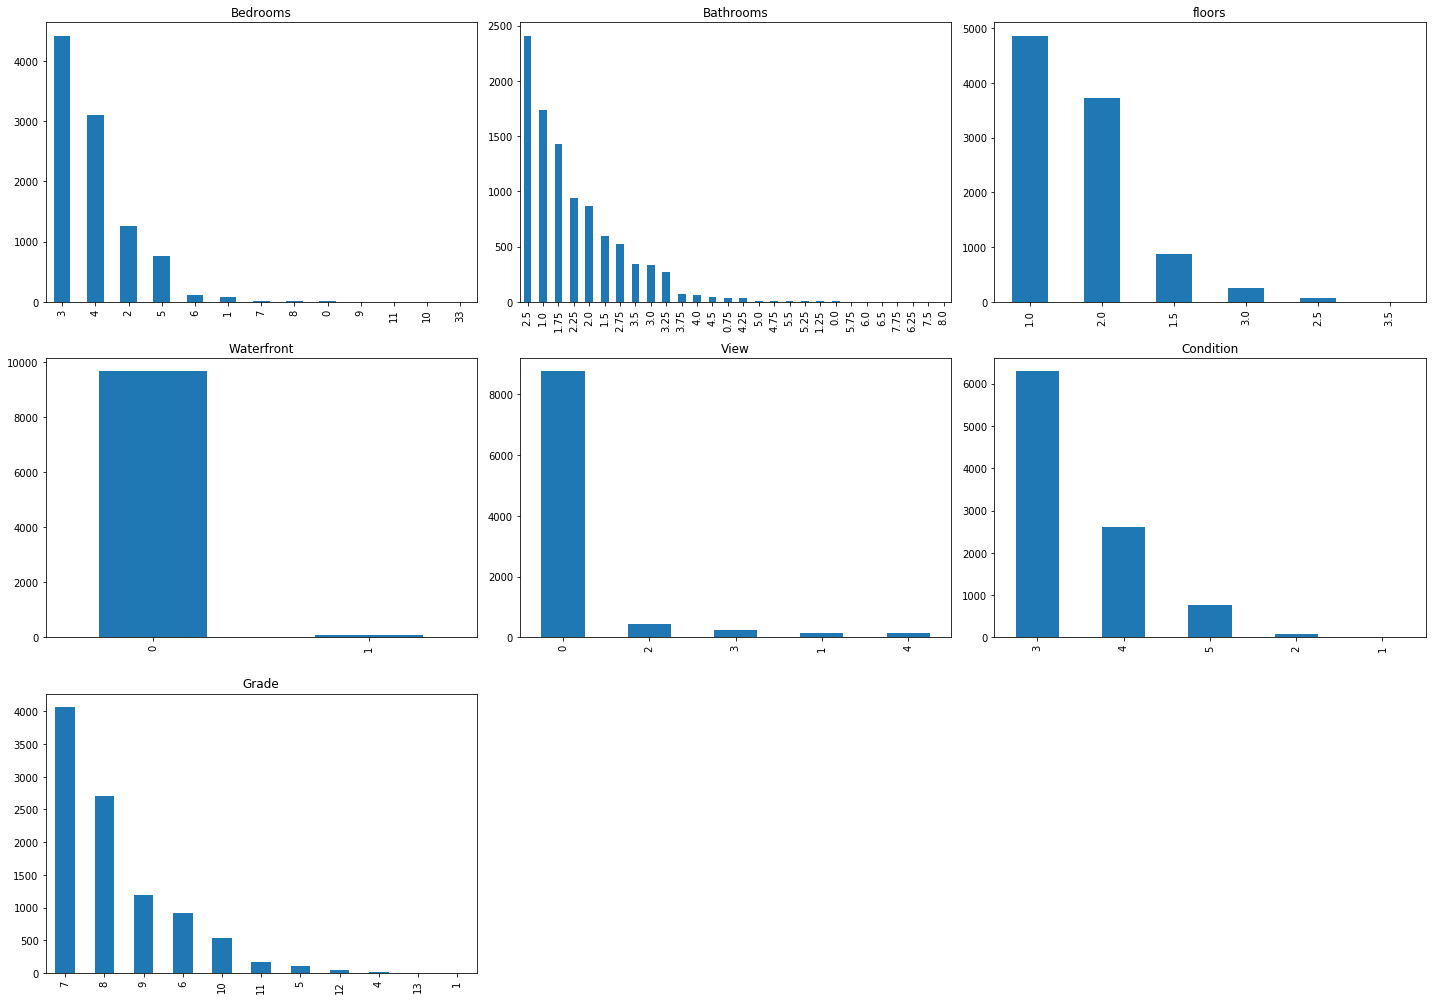

In [1311]:
# Bar Chart for Variables Bedrooms, Bathrooms, Floors, Waterfront, Views, Condition, Grade

fig = plt.figure( figsize=(20,14), tight_layout = True)
# Divide the figure into a 3x3 grid, and give me the first section
ax1 = fig.add_subplot(331)

# Divide the figure into a 3x3 grid, and give me the second section
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)


house['bedrooms'].value_counts().plot(kind = 'bar', ax = ax1, title = 'Bedrooms')
house['bathrooms'].value_counts().plot(kind = 'bar', ax= ax2, title = 'Bathrooms')
house['floors'].value_counts().plot(kind = 'bar', ax= ax3, title = 'floors')
house['waterfront'].value_counts().plot(kind = 'bar', ax= ax4, title = 'Waterfront')
house['view'].value_counts().plot(kind = 'bar', ax= ax5, title = 'View')
house['condition'].value_counts().plot(kind = 'bar', ax= ax6, title = 'Condition')
house['grade'].value_counts().plot(kind = 'bar', ax= ax7, title = 'Grade')

Text(0, 0.5, 'Frequency')

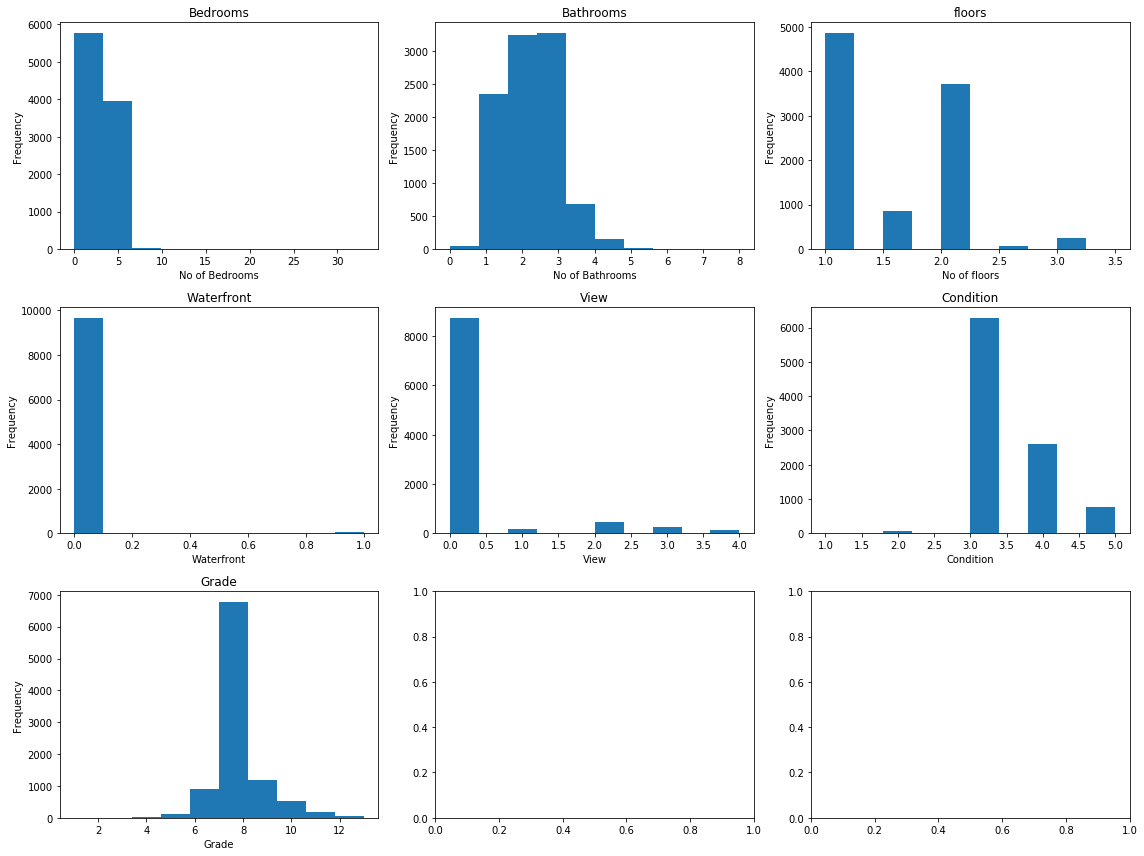

In [1312]:
# Histogram for Descrete Variable Bedrooms, Bathrooms, Floors, Waterfront, Views, Condition, Grade
fig, axs = plt.subplots(3,3, figsize = (16,12), tight_layout = True)

axs[0,0].hist(house.bedrooms )
axs[0,0].set_title('Bedrooms')
axs[0,0].set_xlabel('No of Bedrooms')
axs[0,0].set_ylabel('Frequency')

axs[0,1].hist(house.bathrooms)
axs[0,1].set_title('Bathrooms')
axs[0,1].set_xlabel('No of Bathrooms')
axs[0,1].set_ylabel('Frequency')

axs[0,2].hist(house.floors)
axs[0,2].set_title('floors')
axs[0,2].set_xlabel('No of floors')
axs[0,2].set_ylabel('Frequency')


axs[1,0].hist(house.waterfront)
axs[1,0].set_title('Waterfront')
axs[1,0].set_xlabel('Waterfront')
axs[1,0].set_ylabel('Frequency')

axs[1,1].hist(house.view)
axs[1,1].set_title('View')
axs[1,1].set_xlabel('View')
axs[1,1].set_ylabel('Frequency')

axs[1,2].hist(house.condition)
axs[1,2].set_title('Condition')
axs[1,2].set_xlabel('Condition')
axs[1,2].set_ylabel('Frequency')

axs[2,0].hist(house.grade)
axs[2,0].set_title('Grade')
axs[2,0].set_xlabel('Grade')
axs[2,0].set_ylabel('Frequency')



In [1313]:
# All variables have skewed distribution with long right tail except grade and condition. I observed house have 33 bedrooms with 1.75 bathrooms, this must be anomalies and need to be corrected.

## Age  & Renovated Age of House

Text(0, 0.5, 'Renovated Age')

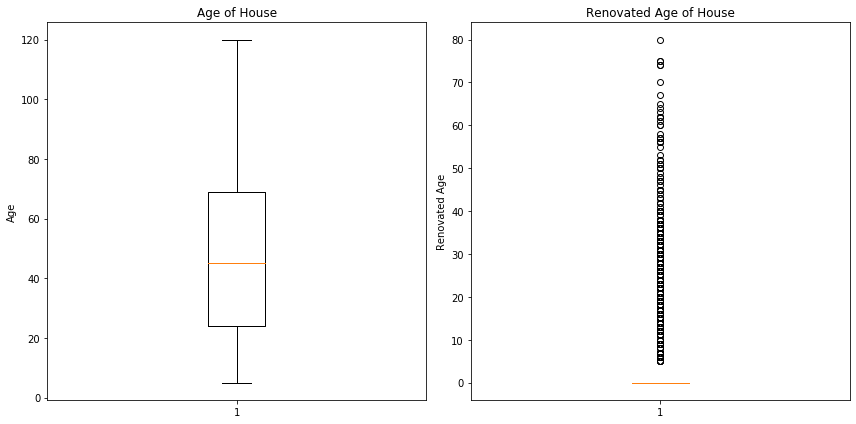

In [1314]:
# Box-Plot for Age & Renovated House
fig, axs = plt.subplots(1,2, figsize = (12,6), tight_layout = True)

axs[0].boxplot(house.age)
axs[0].set_title('Age of House')
axs[0].set_ylabel('Age')

axs[1].boxplot(house.renovated_age)
axs[1].set_title('Renovated Age of House')
axs[1].set_ylabel('Renovated Age')

Text(0, 0.5, 'Frequency')

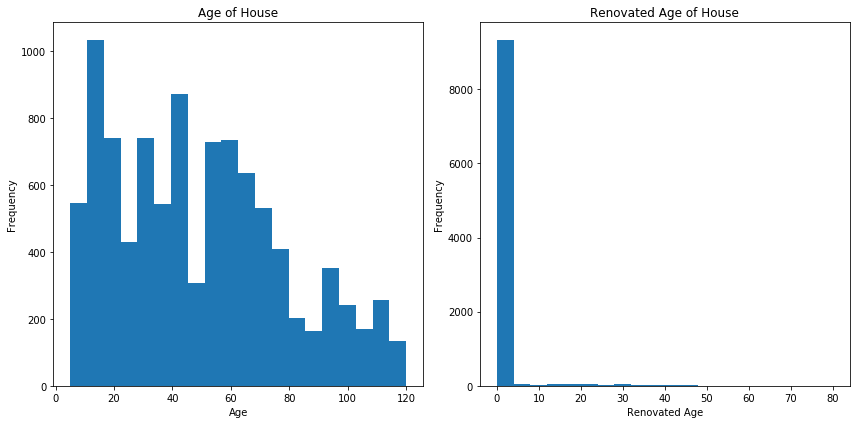

In [1315]:
# Histogram for Age & Renovated House
fig, axs = plt.subplots(1,2, figsize = (12,6), tight_layout = True)

axs[0].hist(house.age, bins = 20 )
axs[0].set_title('Age of House')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

axs[1].hist(house.renovated_age, bins = 20)
axs[1].set_title('Renovated Age of House')
axs[1].set_xlabel('Renovated Age')
axs[1].set_ylabel('Frequency')

In [1316]:
house.renovated_age.value_counts()

0.0     9340
6.0       42
20.0      19
15.0      17
17.0      16
        ... 
49.0       1
58.0       1
80.0       1
44.0       1
55.0       1
Name: renovated_age, Length: 65, dtype: int64

In [1317]:
# Most of the House(9340 out of 9671) is not Renovated

## Price

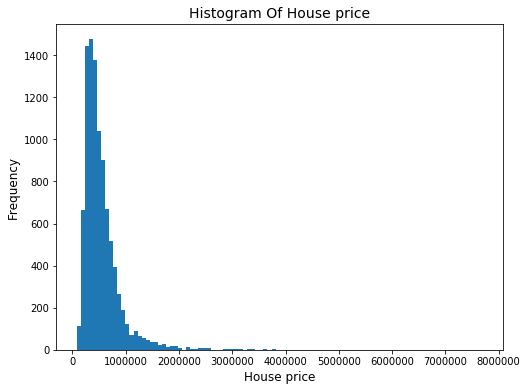

In [1318]:
# Histogram for Price
#Labelling the Hitogram
house.hist(column = 'price', bins = 100,
             grid = False,figsize = (8,6)) # to plot horizontal plot

plt.xlabel("House price", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.title("Histogram Of House price", fontsize = 14)
plt.show()

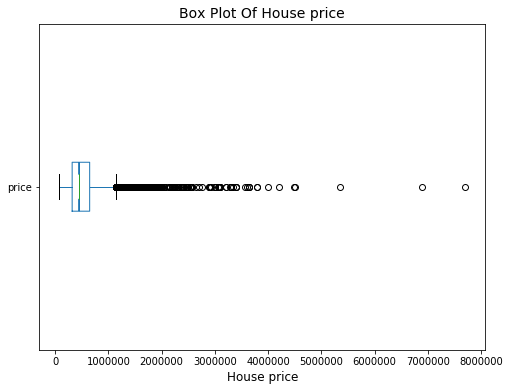

In [1319]:
# Box-Plot for Price
#Labelling the boxplot
house.boxplot(column = "price", notch = True, 
             grid = False, vert = False, figsize = (8,6)) # to plot horizontal plot

plt.xlabel("House price", fontsize = 12)
plt.title("Box Plot Of House price", fontsize = 14)
plt.show()

In [1320]:
# Price have highly skewed distribution with log right tail.

## Square Foot Living, Square Foot Lot, Square Foot Basemant, Square Foot Above

Text(0, 0.5, 'Frequency')

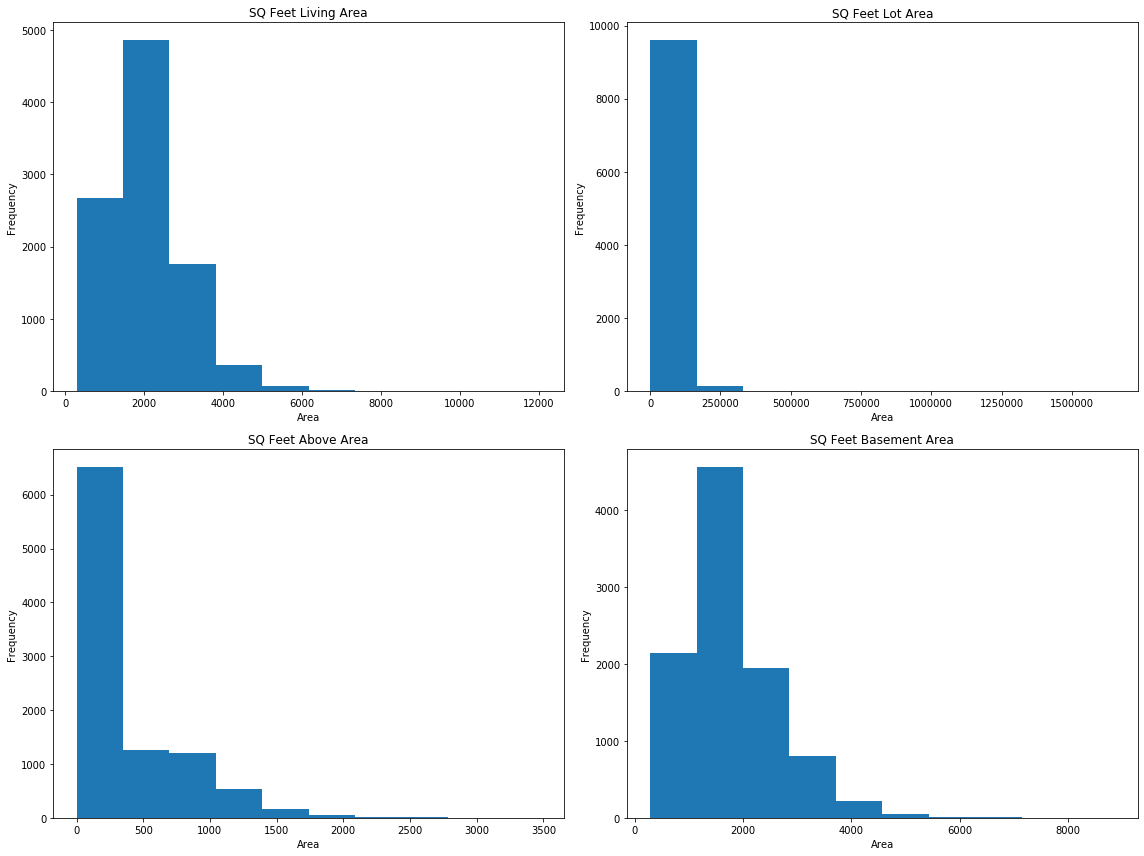

In [1321]:
# Histogram For Cont. Numerical Variable Square Foot Living, Square Foot Lot, Square Foot Basemant, Square Foot Above
fig, axs = plt.subplots(2,2, figsize = (16,12), tight_layout = True)

axs[0,0].hist(house.sqft_living )
axs[0,0].set_title('SQ Feet Living Area')
axs[0,0].set_xlabel('Area')
axs[0,0].set_ylabel('Frequency')

axs[0,1].hist(house.sqft_lot)
axs[0,1].set_title('SQ Feet Lot Area')
axs[0,1].set_xlabel('Area')
axs[0,1].set_ylabel('Frequency')

axs[1,0].hist(house.sqft_basement)
axs[1,0].set_title('SQ Feet Above Area')
axs[1,0].set_xlabel('Area')
axs[1,0].set_ylabel('Frequency')

axs[1,1].hist(house.sqft_above)
axs[1,1].set_title('SQ Feet Basement Area')
axs[1,1].set_xlabel('Area')
axs[1,1].set_ylabel('Frequency')

Text(0, 0.5, 'Area')

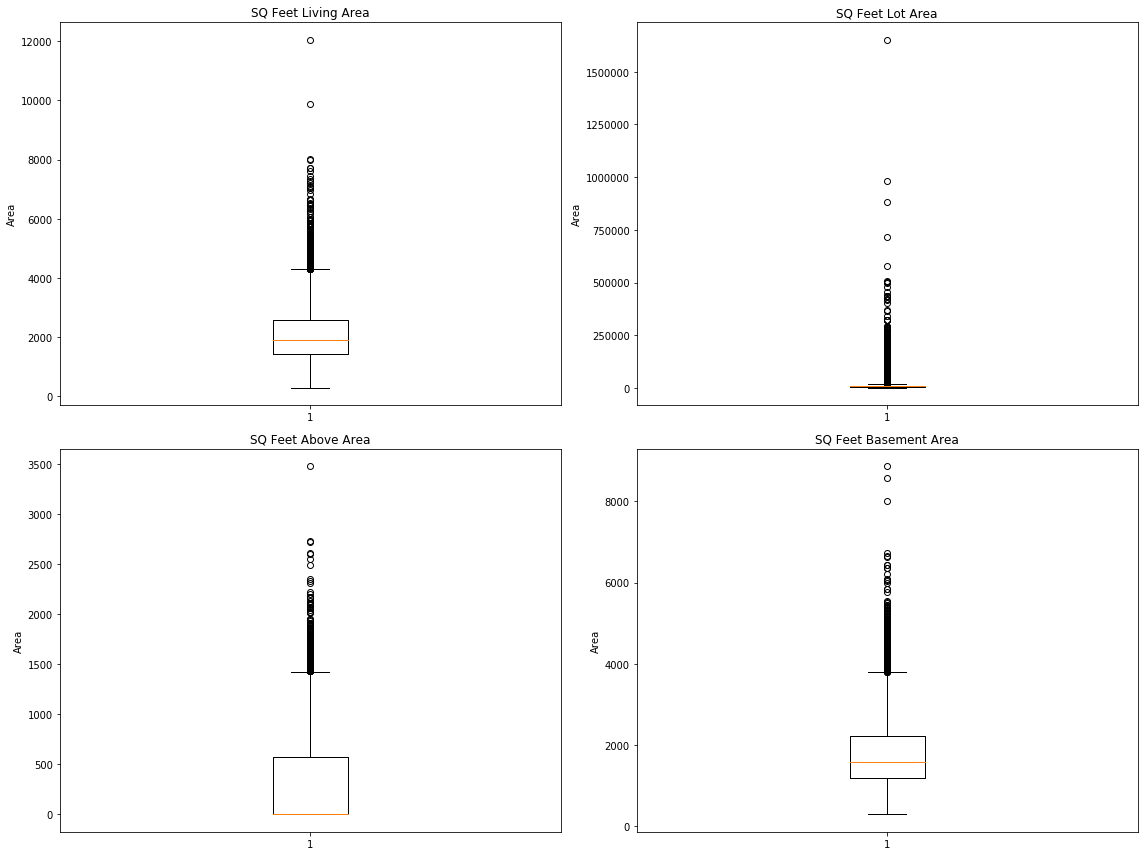

In [1322]:
# Box-Plot For Cont. Numerical Variable Square Foot Living, Square Foot Lot, Square Foot Basemant, Square Foot Above
fig, axs = plt.subplots(2,2, figsize = (16,12), tight_layout = True)

axs[0,0].boxplot(house.sqft_living )
axs[0,0].set_title('SQ Feet Living Area')
axs[0,0].set_ylabel('Area')

axs[0,1].boxplot(house.sqft_lot)
axs[0,1].set_title('SQ Feet Lot Area')
axs[0,1].set_ylabel('Area')

axs[1,0].boxplot(house.sqft_basement)
axs[1,0].set_title('SQ Feet Above Area')
axs[1,0].set_ylabel('Area')

axs[1,1].boxplot(house.sqft_above)
axs[1,1].set_title('SQ Feet Basement Area')
axs[1,1].set_ylabel('Area')

In [1323]:
# Square foot living, lot, above and basement areas have  highly skewed distribution with long right tail.

# Bi-Variate Analysis

In [1324]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated_age
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,...,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,...,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165,49.200492,1.057679
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,...,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402,29.240009,5.894344
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000,5.000000,0.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000,24.000000,0.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000,45.000000,0.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,...,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000,69.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000,120.000000,80.000000


## Boxplot Group by No of Bedroms

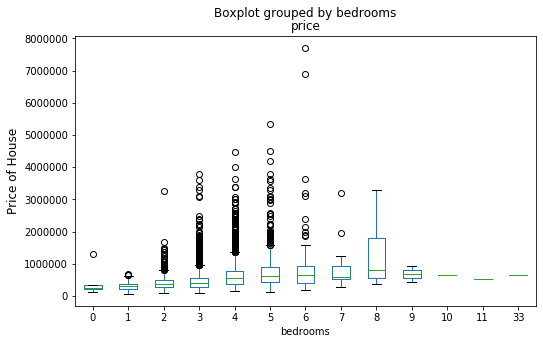

In [1325]:
#Side by Side boxplot of Price to Bedrooms
house.boxplot(column = "price", notch = False, by = "bedrooms", grid = False, figsize = (8,5))

plt.ylabel("Price of House", fontsize = 12)
#plt.title("Boxplot Of Weight", fontsize = 14)
plt.show()

In [1326]:
# we can say that Bedrooms do not have significant effect on house price.

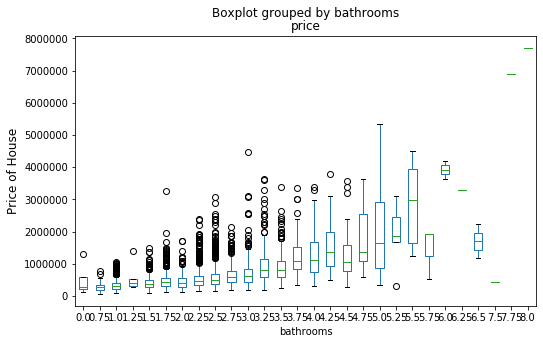

In [1327]:
#Side by Side boxplot Price to Bathrooms
house.boxplot(column = "price", notch = False, by = "bathrooms", grid = False, figsize = (8,5))

plt.ylabel("Price of House", fontsize = 12)
#plt.title("Boxplot Of Weight", fontsize = 14)
plt.show()

In [1329]:
# we can say that bathrooms have significant effect on house price.

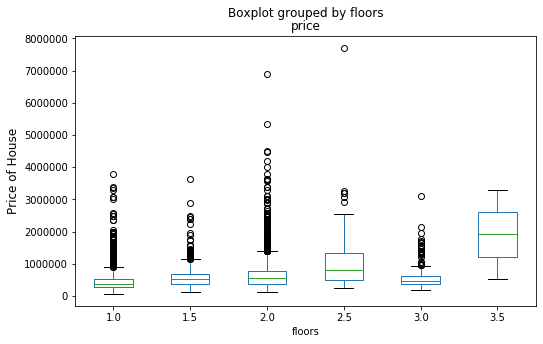

In [1330]:
#Side by Side boxplot Price to Floors
house.boxplot(column = "price", notch = False, by = "floors", grid = False, figsize = (8,5))

plt.ylabel("Price of House", fontsize = 12)
#plt.title("Boxplot Of Weight", fontsize = 14)
plt.show()

In [1331]:
# we can say that Floors do not have significant effect on house price.

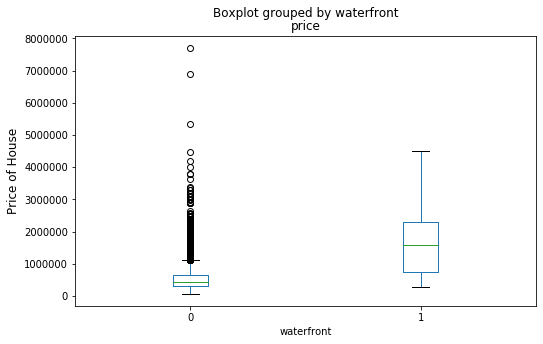

In [1332]:
#Side by Side boxplot Price to Waterfront
house.boxplot(column = "price", notch = False, by = "waterfront", grid = False, figsize = (8,5))

plt.ylabel("Price of House", fontsize = 12)
#plt.title("Boxplot Of Weight", fontsize = 14)
plt.show()

In [1333]:
# we can say that waterfront have significant effect on house price.

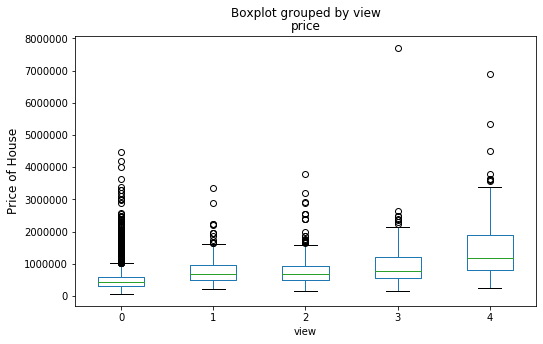

In [1334]:
#Side by Side boxplot Price to view
house.boxplot(column = "price", notch = False, by = "view", grid = False, figsize = (8,5))

plt.ylabel("Price of House", fontsize = 12)
#plt.title("Boxplot Of Weight", fontsize = 14)
plt.show()

In [1335]:
# we cana say that view do not have significant effect on house price.

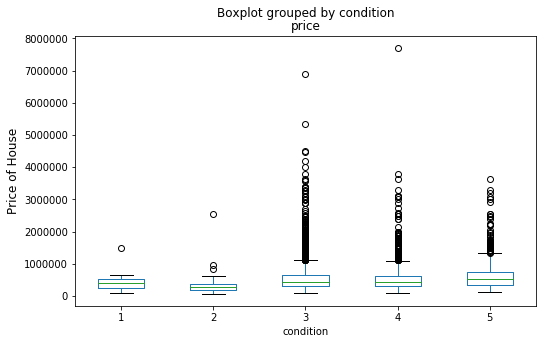

In [1336]:
#Side by Side boxplot Price to Condition
house.boxplot(column = "price", notch = False, by = "condition", grid = False, figsize = (8,5))

plt.ylabel("Price of House", fontsize = 12)
#plt.title("Boxplot Of Weight", fontsize = 14)
plt.show()

In [1337]:
# we cana say that conition do not have significant effect on house price.

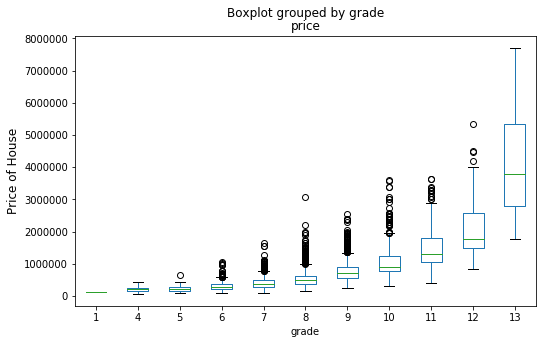

In [1338]:
#Side by Side boxplot Price to Grade
house.boxplot(column = "price", notch = False, by = "grade", grid = False, figsize = (8,5))

plt.ylabel("Price of House", fontsize = 12)
#plt.title("Boxplot Of Weight", fontsize = 14)
plt.show()

In [1339]:
# we can say that house price is exponentially increasing with increase in house grade

# Droping Unwanted Variables

In [1340]:
house_copy = house.drop(['id','date','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15','renovated_age','sqft_basement','sqft_above' ], axis = 1) #,

In [1341]:
house.shape

(9761, 23)

In [1342]:
house_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,98136,55
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,98053,19
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,98115,78
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,98028,93
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,98074,43


In [1343]:
# Checking Co-relation coefficient Matrix
house_copy.corr(method= 'pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
price,1.000000,0.300808,0.527532,0.705052,0.094143,0.262954,0.274977,0.399658,0.044732,0.665567,-0.055629,-0.051759
bedrooms,0.300808,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,-0.148339,-0.155102
bathrooms,0.527532,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,-0.201454,-0.499589
sqft_living,0.705052,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,-0.203761,-0.322723
sqft_lot,0.094143,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,-0.126091,-0.054043
floors,0.262954,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,-0.064479,-0.481926
waterfront,0.274977,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.023656,0.027010
view,0.399658,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.075834,0.056361
condition,0.044732,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,0.003410,0.357396
grade,0.665567,0.342305,0.660925,0.764819,0.115611,0.461545,0.088039,0.258123,-0.133313,1.000000,-0.187340,-0.447817


# Scatter Plot

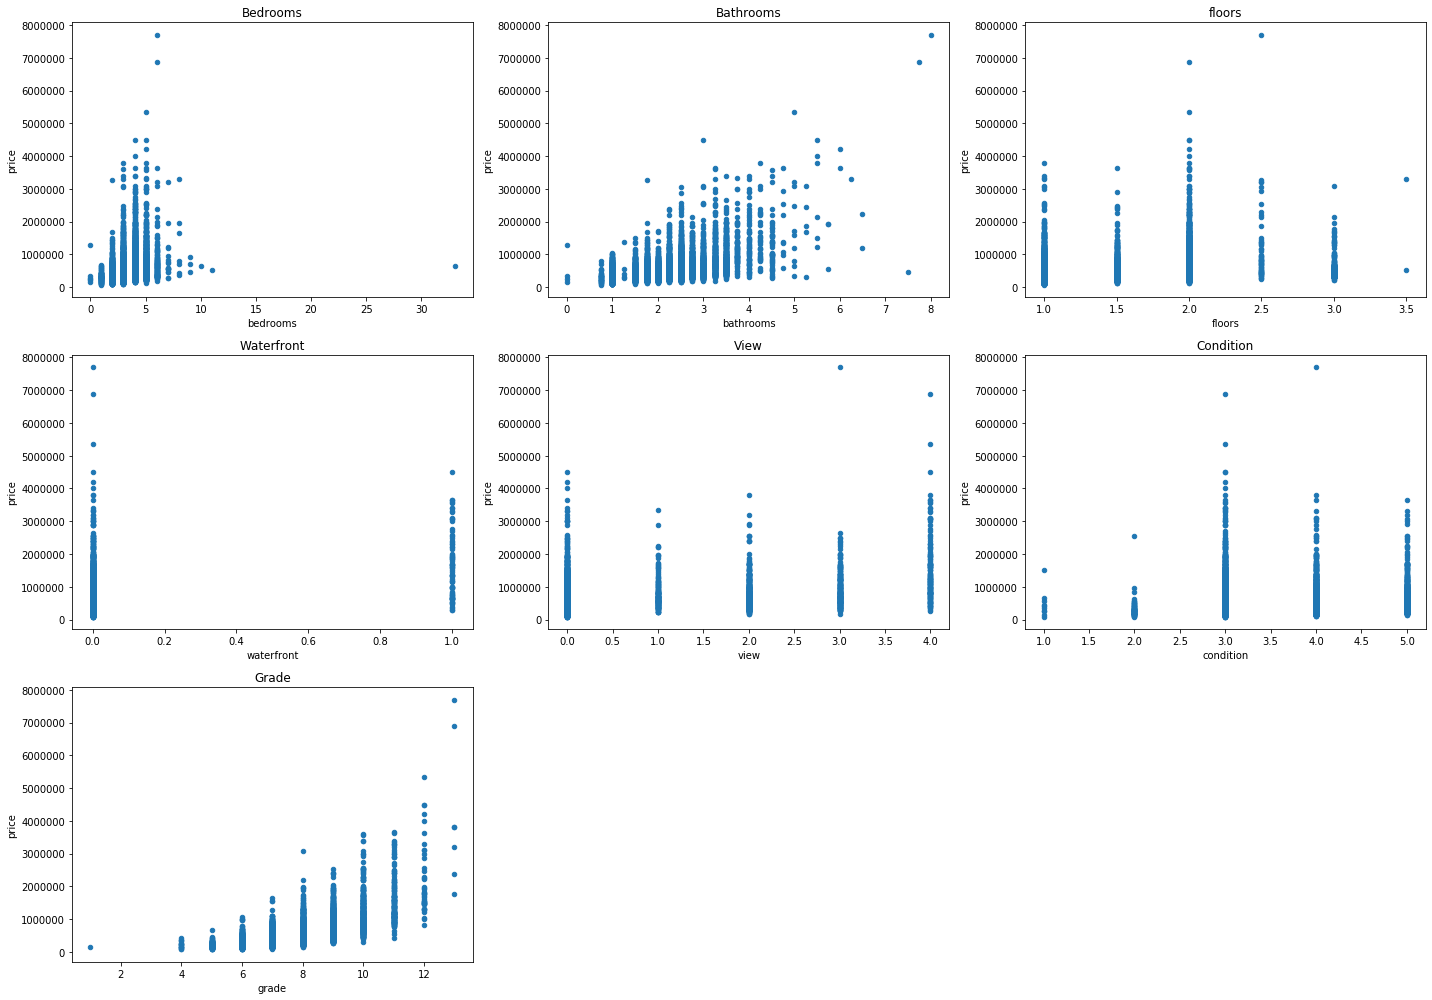

In [1344]:
# Scatter Plot Between price &  Bedrooms, Bathrooms, Floors, Waterfront, Views, Condition, Grade
fig = plt.figure( figsize=(20,14), tight_layout = True)
# Divide the figure into a 3x3 grid, and give me the first section
ax1 = fig.add_subplot(331)

# Divide the figure into a 3x3 grid, and give me the second section
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)


house.plot(kind = 'scatter', ax = ax1, y = 'price', x='bedrooms', title = 'Bedrooms')
house.plot(kind = 'scatter', ax = ax2, y = 'price', x='bathrooms', title = 'Bathrooms')
house.plot(kind = 'scatter', ax = ax3, y = 'price', x='floors', title = 'floors')
house.plot(kind = 'scatter', ax = ax4, y = 'price', x='waterfront', title = 'Waterfront')
house.plot(kind = 'scatter', ax = ax5, y = 'price', x='view', title = 'View')
house.plot(kind = 'scatter', ax = ax6, y = 'price', x='condition', title = 'Condition')
house.plot(kind = 'scatter', ax = ax7, y = 'price', x='grade', title = 'Grade')

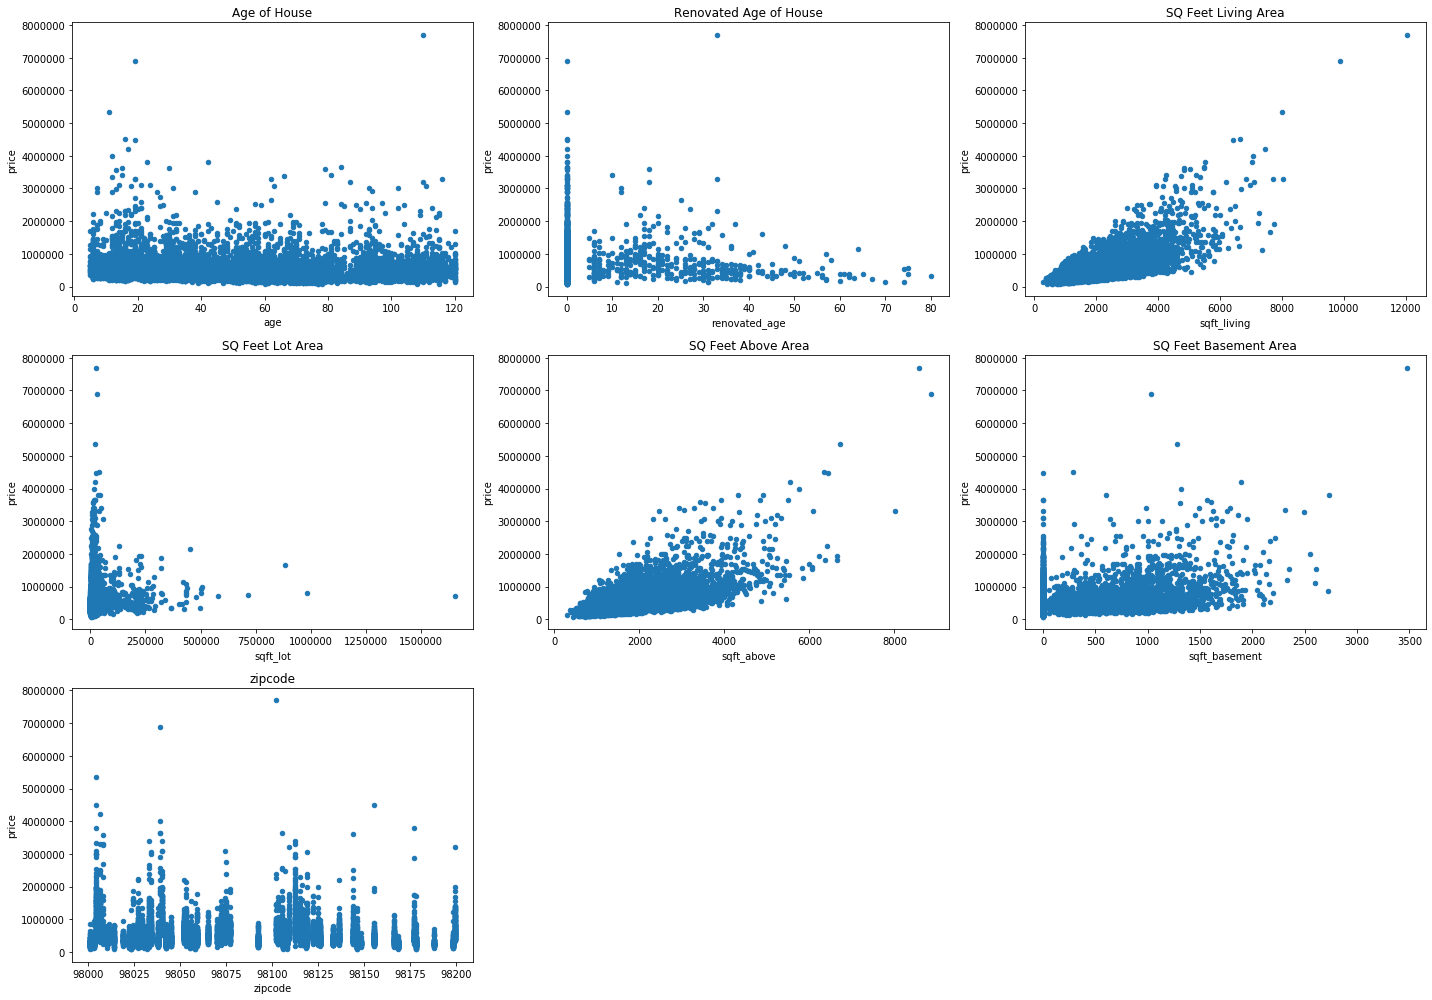

In [1345]:
# Scatter Plot Between price & Square Foot Living, Square Foot Lot, Square Foot Basemant, Square Foot Above
fig = plt.figure( figsize=(20,14), tight_layout = True)
# Divide the figure into a 3x3 grid, and give me the first section
ax1 = fig.add_subplot(331)

# Divide the figure into a 3x3 grid, and give me the second section
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)


house.plot(kind = 'scatter', ax = ax1, y = 'price', x='age', title = 'Age of House')
house.plot(kind = 'scatter', ax = ax2, y = 'price', x='renovated_age', title = 'Renovated Age of House')
house.plot(kind = 'scatter', ax = ax3, y = 'price', x='sqft_living', title = 'SQ Feet Living Area')
house.plot(kind = 'scatter', ax = ax4, y = 'price', x='sqft_lot', title = 'SQ Feet Lot Area')
house.plot(kind = 'scatter', ax = ax5, y = 'price', x='sqft_above', title = 'SQ Feet Above Area')
house.plot(kind = 'scatter', ax = ax6, y = 'price', x='sqft_basement', title = 'SQ Feet Basement Area')
house.plot(kind = 'scatter', ax = ax7, y = 'price', x='zipcode', title = 'zipcode')

In [1346]:
# scatter we can say that house price Is gradually increasing with 
# increase in living, above and basement area except sqft_lot area, 
# and from data we can also say that house living area is divided 
# into sqft_above and sqft_basement.

In [1347]:
house_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 12 columns):
price          9761 non-null float64
bedrooms       9761 non-null int64
bathrooms      9761 non-null float64
sqft_living    9761 non-null int64
sqft_lot       9761 non-null int64
floors         9761 non-null float64
waterfront     9761 non-null int64
view           9761 non-null int64
condition      9761 non-null int64
grade          9761 non-null int64
zipcode        9761 non-null int64
age            9761 non-null int64
dtypes: float64(3), int64(9)
memory usage: 915.2 KB


In [1348]:
# changing Zipcode column to Sting/object
house_copy['zipcode'] = house_copy['zipcode'].apply(str)

## Treating Anamolies

In [1350]:
# we have 33 bedrooms with 1.75 bathrooms in one record which in incorect ,
# so replacing 33 bedrooms with 3 bedrooms as mean is 3 bedrooms of house having 1.75 bathrooms

In [1351]:
house_copy['bedrooms'] = house_copy['bedrooms'].replace(33, 3)

# Importing Validation data

In [1352]:
# importing Valadition data
# setting the working directory
# the depth of Decission tree is length of longest path from root to leaf
import os
import pandas as pd
os.chdir(r'E:\Data Science\Praxis BS\Study Material\TERM 1\ML\Assignment\House_rent')
#reading the data
validation = pd.read_csv('wk3_kc_house_valid_data.csv')

In [1353]:
validation.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [1354]:
# changing Zipcode column to Sting/object
validation['zipcode'] = validation['zipcode'].apply(str)

In [1355]:
# calculating age of House
validation['age'] = (date.today().year - validation['yr_built'])

#house['renovated_age'] = 0
validation['renovated_age'] = (date.today().year - validation['yr_renovated'][validation.yr_renovated !=0])
validation['renovated_age'] = validation['renovated_age'].replace(np.NaN, 0)

In [1356]:
# Droping Unwanted Cloumn as Training data & Validation Data shoud have same predictor
validation = validation.drop(['id','date','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15','renovated_age','sqft_basement','sqft_above' ], axis = 1)
validation.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,98178,65
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,98125,69
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,98028,87
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,98074,33
4,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,98003,25


In [1357]:
house_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,98136,55
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,98053,19
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,98115,78
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,98028,93
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,98074,43


# Model Building

## Model 1
##  Decission Tree Regressor with Normal Scale

In [1359]:
# for fitting classificatio
from sklearn.tree import DecisionTreeRegressor

# To create Confusion matrix
from sklearn.metrics import confusion_matrix

# for comparing Errors
from sklearn import metrics

In [1360]:
x_train = house_copy.drop(['price'], axis =1)
y_train = house_copy[['price']]


x_valid = validation.drop(['price'], axis =1)

y_valid = validation[['price']]

In [1361]:
x_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
0,4,3.0,1960,5000,1.0,0,0,5,7,98136,55
1,4,4.5,5420,101930,1.0,0,0,3,11,98053,19


In [1362]:
y_valid.head(2)

,price
0,221900.0
1,538000.0


In [1363]:
dtreg_model = DecisionTreeRegressor(max_depth= 9, min_samples_leaf=5)
dtreg_model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [1364]:
y_pred = dtreg_model.predict(x_valid)

In [1365]:
y_pred = y_pred.reshape(9635,1)
y_pred.shape

(9635, 1)

### Checking r^2 of Decissio Tree Regressor

In [1369]:
metrics.r2_score(y_valid, y_pred)

0.6900128189754471

In [1370]:
y_valid;

In [1371]:
#Root Mean Squared Error
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_valid, y_pred))}')

Root Mean Squared Error: 198302.8448123637


In [1372]:
#Mean Absolute Error
print(f'Mean Absolute Error: {(metrics.mean_absolute_error(y_valid, y_pred))}')

Mean Absolute Error: 121132.67755860917


In [1373]:
#Mean absolute Percentage Error
print(f'Mean absolute Percentage Error: {(100/len(y_valid)) * np.sum(np.absolute(y_valid - y_pred)/y_valid)}')

Mean absolute Percentage Error: price    24.386073
dtype: float64


In [1374]:
#Mean absolute Percentage Error
print(f'Mean absolute Percentage Error: {100 * (np.mean(np.absolute(y_valid - y_pred)/y_valid))}')

Mean absolute Percentage Error: price    24.386073
dtype: float64


In [1375]:
# Accuracy ( 100 - MAPE)
print('Accuracy:', 100 - 24.38)

Accuracy: 75.62


## Model 2
## DTR with Logarithmic Scaled for Price

In [1376]:
## as Price Column have higher values in dataset, i will suggest to take log of Price column

In [1377]:
x_train = house_copy.drop(['price'], axis =1)
y_train = np.log(house_copy[['price']])

x_valid = validation.drop(['price'], axis =1)

y_valid = validation[['price']]

In [1378]:
dtreg_model_log = DecisionTreeRegressor(max_depth= 9, min_samples_leaf=5)
dtreg_model_log.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [1379]:
y_pred = dtreg_model_log.predict(x_valid)

In [1380]:
y_pred.shape

(9635,)

In [1381]:
y_pred = y_pred.reshape(9635,1)
y_pred

array([[12.32813406],
       [13.17060171],
       [12.51086125],
       ...,
       [12.97262232],
       [13.07526363],
       [12.97262232]])

In [1382]:
y_pred = np.exp(y_pred)
y_pred

array([[225964.69719963],
       [524710.37067128],
       [271267.64847116],
       ...,
       [430465.44173837],
       [476996.11937333],
       [430465.44173837]])

### Checking r^2 of Decission Tree Regressor

In [1383]:
metrics.r2_score(y_valid, y_pred)

0.6683069508049649

In [1384]:
#Root Mean Squared Error
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_valid, y_pred))}')

Root Mean Squared Error: 205128.1496753736


In [1385]:
#Mean Absolute Error
print(f'Mean Absolute Error: {(metrics.mean_absolute_error(y_valid, y_pred))}')

Mean Absolute Error: 121312.181429489


In [1386]:
#Mean absolute Percentage Error
print(f'Mean absolute Percentage Error: {100 * (np.mean(np.absolute(y_valid - y_pred)/y_valid))}')

Mean absolute Percentage Error: price    23.282608
dtype: float64


In [1387]:
# Accuracy ( 100 - MAPE)
print('Accuracy:', 100 - 23.28)

Accuracy: 76.72


## Model 3
## Linear Regression

In [1388]:
# for LR using Statmodel API package
import statsmodels.api as stm

In [1389]:
x_train = house_copy[['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
                 'waterfront','view','condition','grade','age']]
y_train = house_copy[['price']]

x_valid = validation[['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
                 'waterfront','view','condition','grade','age']]
y_valid = validation[['price']]


In [1390]:
x_train = stm.add_constant(x_train)

F:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1391]:
x_train.shape

(9761, 11)

In [1392]:
LR = stm.OLS(y_train,x_train).fit()
LR.params

const         -1.023752e+06
bedrooms      -4.405302e+04
bathrooms      5.030825e+04
sqft_living    1.827385e+02
sqft_lot      -2.226949e-01
floors         2.516406e+04
waterfront     6.109440e+05
view           4.240465e+04
condition      1.595513e+04
grade          1.221304e+05
age            3.808412e+03
dtype: float64

In [1393]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1870.
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        15:56:04   Log-Likelihood:            -1.3402e+05
No. Observations:                9761   AIC:                         2.681e+05
Df Residuals:                    9750   BIC:                         2.681e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.024e+06   2.67e+04    -38.341      0.000   -1.08e+06   -9.71e+05
bedrooms    -4.405e+04   3210.439    -13.722      0.000   -5.03e+04   -3.78e+04
bathrooms    5.031e+04   5182.695      9.707      0.000    4.01e+04    6.05e+04
sqft_living   182.7385      5.024     36.370      0.000     172.890     192.587
sqft_lot       -0.2227      0.056     -3.995      0.000      -0.332      -0.113
floors       2.516e+04   5300.820      4.747      0.000    1.48e+04    3.56e+04
waterfront   6.109e+05    2.7e+04     22.653      0.000    5.58e+05    6.64e+05
view          4.24e+04   3321.137     12.768      0.000    3.59e+04    4.89e+04
condition    1.596e+04   3764.425      4.238      0.000    8576.074    2.33e+04
grade        1.221e+05   3263.960     37.418      0.000    1.16e+05    1.29e+05
age          3808.4121    101.797     37.412      0.000    3608.869    4007.955
==============================================================================
Omnibus:                     7714.904   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           632886.811
Skew:                           3.208   Prob(JB):                         0.00
Kurtosis:                      41.923   Cond. No.                     5.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1394]:
x_valid = stm.add_constant(x_valid)

In [1395]:
y_pred = LR.predict(x_valid)

In [1396]:
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(9635,1)
y_pred.shape

(9635, 1)

In [1397]:
# Root Mean Squared Error
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_valid, y_pred))}')

Root Mean Squared Error: 210105.99456356582


In [1398]:
#Mean absolute Percentage Error
print(f'Mean absolute Percentage Error: {(100/len(y_valid)) * np.sum(np.absolute(y_valid - y_pred)/y_valid)}')

Mean absolute Percentage Error: price    29.404518
dtype: float64


In [1399]:
# Accuracy ( 100 - MAPE)
print('Accuracy:', 100 - 29.44)

Accuracy: 70.56


## Model 4
## Linear Regression with Zipcode Dummies

In [1414]:
house_copy.shape
house_copy.head(5)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,zipcode,age
0,604000.0,4,3.00,1960,1.0,0,0,7,98136,55
1,1225000.0,4,4.50,5420,1.0,0,0,11,98053,19
2,468000.0,2,1.00,1160,1.0,0,0,7,98115,78
3,310000.0,3,1.00,1430,1.5,0,0,7,98028,93
4,400000.0,3,1.75,1370,1.0,0,0,7,98074,43


In [1415]:
house_copy.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,age
price,1.000000,0.315763,0.527532,0.705052,0.262954,0.274977,0.399658,0.665567,-0.051759
bedrooms,0.315763,1.000000,0.534279,0.592184,0.193637,-0.006851,0.085123,0.362189,-0.165999
bathrooms,0.527532,0.534279,1.000000,0.758930,0.501899,0.061483,0.182988,0.660925,-0.499589
sqft_living,0.705052,0.592184,0.758930,1.000000,0.366219,0.097203,0.285735,0.764819,-0.322723
floors,0.262954,0.193637,0.501899,0.366219,1.000000,0.022443,0.031938,0.461545,-0.481926
waterfront,0.274977,-0.006851,0.061483,0.097203,0.022443,1.000000,0.402725,0.088039,0.027010
view,0.399658,0.085123,0.182988,0.285735,0.031938,0.402725,1.000000,0.258123,0.056361
grade,0.665567,0.362189,0.660925,0.764819,0.461545,0.088039,0.258123,1.000000,-0.447817
age,-0.051759,-0.165999,-0.499589,-0.322723,-0.481926,0.027010,0.056361,-0.447817,1.000000


In [1417]:
## As Condition & Sqft_lot have Lower co-relation coefficient
## we will drop them and  will checkmetrics again

In [1416]:
house_copy = house_copy.drop('condition', axis = 1)
house_copy = house_copy.drop('sqft_lot', axis = 1)

KeyError: "['condition'] not found in axis"

## Taking log of price, sqft living, sqft lot,
## Taking square of bathroom and bedroom

In [1418]:

house_copy['price'] = np.log(house_copy.price)
house_copy['bathrooms'] = np.square(house_copy.bathrooms)
house_copy['bedrooms'] = np.square(house_copy.bedrooms)
house_copy['sqft_living'] = np.log(house_copy.sqft_living)


In [1419]:
house_copy.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,zipcode,age
0,13.311329,16,9.0000,7.580700,1.0,0,0,7,98136,55
1,14.018451,16,20.2500,8.597851,1.0,0,0,11,98053,19
2,13.056224,4,1.0000,7.056175,1.0,0,0,7,98115,78
3,12.644328,9,1.0000,7.265430,1.5,0,0,7,98028,93
4,12.899220,9,3.0625,7.222566,1.0,0,0,7,98074,43


In [1420]:
# 

### Matching Validation Data with Training data

In [1421]:
validation = validation.drop('condition', axis = 1)
validation = validation.drop('sqft_lot', axis = 1)

In [1422]:
validation['bathrooms'] = np.square(validation.bathrooms)
validation['bedrooms'] = np.square(validation.bedrooms)
validation['sqft_living'] = np.log(validation.sqft_living)

In [1423]:
validation.shape
validation.head(3)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,zipcode,age
0,221900.0,9,1.0000,7.073270,1.0,0,0,7,98178,65
1,538000.0,9,5.0625,7.851661,2.0,0,0,7,98125,69
2,180000.0,4,1.0000,6.646391,1.0,0,0,6,98028,87


In [1424]:
#Creating Dummies for Training data
house_dum = pd.get_dummies(house_copy, drop_first= True)
house_dum.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,age,zipcode_98002,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,13.311329,16,9.0000,7.580700,1.0,0,0,7,55,0,...,0,0,0,0,0,0,0,0,0,0
1,14.018451,16,20.2500,8.597851,1.0,0,0,11,19,0,...,0,0,0,0,0,0,0,0,0,0
2,13.056224,4,1.0000,7.056175,1.0,0,0,7,78,0,...,0,0,0,0,0,0,0,0,0,0
3,12.644328,9,1.0000,7.265430,1.5,0,0,7,93,0,...,0,0,0,0,0,0,0,0,0,0
4,12.899220,9,3.0625,7.222566,1.0,0,0,7,43,0,...,0,0,0,0,0,0,0,0,0,0


In [1425]:
#Creating Dummies for Validation data
validation_dum = pd.get_dummies(validation, drop_first= True)
validation_dum.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,age,zipcode_98002,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,9,1.0000,7.073270,1.0,0,0,7,65,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,9,5.0625,7.851661,2.0,0,0,7,69,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,4,1.0000,6.646391,1.0,0,0,6,87,0,...,0,0,0,0,0,0,0,0,0,0
3,510000.0,9,4.0000,7.426549,1.0,0,0,8,33,0,...,0,0,0,0,0,0,0,0,0,0
4,257500.0,9,5.0625,7.447168,2.0,0,0,7,25,0,...,0,0,0,0,0,0,0,0,0,0


In [1426]:
# Trying Linear Regression with zipcode Dummies
x_train = house_dum.drop(['price'], axis = 1)
y_train = house_dum[['price']]

x_valid = validation_dum.drop(['price'], axis = 1)
y_valid = validation_dum[['price']]


In [1427]:
x_train = stm.add_constant(x_train)
x_valid = stm.add_constant(x_valid)

F:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1428]:
LR = stm.OLS(y_train,x_train).fit()
LR.params

const            8.001751
bedrooms        -0.001596
bathrooms        0.007466
sqft_living      0.473224
floors          -0.011466
                   ...   
zipcode_98177    0.548099
zipcode_98178    0.081729
zipcode_98188    0.061114
zipcode_98198    0.029722
zipcode_98199    0.771654
Length: 78, dtype: float64

In [1429]:
y_pred = LR.predict(x_valid)

In [1430]:
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(9635,1)
y_pred = y_pred
y_pred.shape

(9635, 1)

In [1431]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     882.5
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        15:57:52   Log-Likelihood:                 2475.8
No. Observations:                9761   AIC:                            -4796.
Df Residuals:                    9683   BIC:                            -4235.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0018      0.056    141.854      0.000       7.891       8.112
bedrooms         -0.0016      0.000     -4.314      0.000      -0.002      -0.001
bathrooms         0.0075      0.001      9.374      0.000       0.006       0.009
sqft_living       0.4732      0.009     53.712      0.000       0.456       0.490
floors           -0.0115      0.005     -2.394      0.017      -0.021      -0.002
waterfront        0.4730      0.023     20.201      0.000       0.427       0.519
view              0.0659      0.003     22.724      0.000       0.060       0.072
grade             0.1219      0.003     41.899      0.000       0.116       0.128
age               0.0015    9.9e-05     15.299      0.000       0.001       0.002
zipcode_98002    -0.0471      0.026     -1.802      0.072      -0.098       0.004
zipcode_98003    -0.0113      0.023     -0.496      0.620      -0.056       0.033
zipcode_98004     1.1320      0.022     50.713      0.000       1.088       1.176
zipcode_98005     0.7182      0.027     27.067      0.000       0.666       0.770
zipcode_98006     0.6496      0.020     32.349      0.000       0.610       0.689
zipcode_98007     0.6426      0.029     22.524      0.000       0.587       0.698
zipcode_98008     0.6198      0.022     27.771      0.000       0.576       0.664
zipcode_98010     0.2619      0.031      8.426      0.000       0.201       0.323
zipcode_98011     0.4110      0.026     16.061      0.000       0.361       0.461
zipcode_98014     0.3882      0.029     13.405      0.000       0.331       0.445
zipcode_98019     0.3376      0.026     12.873      0.000       0.286       0.389
zipcode_98022     0.0988      0.024      4.150      0.000       0.052       0.146
zipcode_98023    -0.0467      0.019     -2.436      0.015      -0.084      -0.009
zipcode_98024     0.5279      0.034     15.303      0.000       0.460       0.596
zipcode_98027     0.5108      0.021     24.907      0.000       0.471       0.551
zipcode_98028     0.3811      0.022     17.191      0.000       0.338       0.425
zipcode_98029     0.5776      0.022     26.035      0.000       0.534       0.621
zipcode_98030     0.0353      0.023      1.524      0.127      -0.010       0.081
zipcode_98031     0.0703      0.022      3.175      0.002       0.027       0.114
zipcode_98032    -0.0448      0.030     -1.516      0.129      -0.103       0.013
zipcode_98033     0.7713      0.020     38.037      0.000       0.732       0.811
zipcode_98034     0.5137      0.019     26.903      0.000       0.476       0.551
zipcode_98038     0.1924      0.019     10.064      0.000       0.155       0.230
zipcode_98039     1.2491      0.045     27.548      0.000       1.160       1.338
zipcode_98040     0.8789      0.023     38.632      0.000       0.834       0.924
zipcode_98042     0.0709      0.019      3.718   

In [1432]:
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_valid, np.exp(y_pred)))}')

Root Mean Squared Error: 128050.2210161239


In [1433]:
print(f'Mean absolute Percentage Error: {(100/len(y_valid)) * np.sum(np.absolute(y_valid - np.exp(y_pred))/y_valid)}')

Mean absolute Percentage Error: price    14.356863
dtype: float64


In [1434]:
# Accuracy ( 100 - MAPE)
print('Accuracy:', 100 - 14.35)

Accuracy: 85.65


## Model 5

### we have lowest RSME and lowest MAPE in Model 5
### Now i will try to reduce variable without losing significant RSME &        MAPE

In [1435]:
house_copy.head(5)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,zipcode,age
0,13.311329,16,9.0000,7.580700,1.0,0,0,7,98136,55
1,14.018451,16,20.2500,8.597851,1.0,0,0,11,98053,19
2,13.056224,4,1.0000,7.056175,1.0,0,0,7,98115,78
3,12.644328,9,1.0000,7.265430,1.5,0,0,7,98028,93
4,12.899220,9,3.0625,7.222566,1.0,0,0,7,98074,43


In [1436]:
house_copy.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,age
price,1.000000,0.337799,0.542470,0.679749,0.318263,0.187196,0.353025,0.708475,-0.079702
bedrooms,0.337799,1.000000,0.491097,0.584742,0.176475,-0.003982,0.087590,0.321343,-0.123952
bathrooms,0.542470,0.491097,1.000000,0.706134,0.453404,0.072460,0.200130,0.629558,-0.423552
sqft_living,0.679749,0.584742,0.706134,1.000000,0.378290,0.080446,0.249385,0.745121,-0.355394
floors,0.318263,0.176475,0.453404,0.378290,1.000000,0.022443,0.031938,0.461545,-0.481926
waterfront,0.187196,-0.003982,0.072460,0.080446,0.022443,1.000000,0.402725,0.088039,0.027010
view,0.353025,0.087590,0.200130,0.249385,0.031938,0.402725,1.000000,0.258123,0.056361
grade,0.708475,0.321343,0.629558,0.745121,0.461545,0.088039,0.258123,1.000000,-0.447817
age,-0.079702,-0.123952,-0.423552,-0.355394,-0.481926,0.027010,0.056361,-0.447817,1.000000


In [1437]:
## As Bedrooms, Floors, View, Age have Lower co-relation coefficient
## we will drop them and  will checkmetrics again

In [1438]:
house_copy = house_copy.drop('bedrooms', axis = 1)
house_copy = house_copy.drop('floors', axis = 1)
house_copy = house_copy.drop('view', axis = 1)
house_copy = house_copy.drop('age', axis = 1)

In [1439]:
house_copy.head(5)

,price,bathrooms,sqft_living,waterfront,grade,zipcode
0,13.311329,9.0000,7.580700,0,7,98136
1,14.018451,20.2500,8.597851,0,11,98053
2,13.056224,1.0000,7.056175,0,7,98115
3,12.644328,1.0000,7.265430,0,7,98028
4,12.899220,3.0625,7.222566,0,7,98074


In [1440]:
### Matching Validation Data with Training data

validation = validation.drop('bedrooms', axis = 1)
validation = validation.drop('floors', axis = 1)
validation = validation.drop('view', axis = 1)
validation = validation.drop('age', axis = 1)

In [1442]:
validation.head(5)

,price,bathrooms,sqft_living,waterfront,grade,zipcode
0,221900.0,1.0000,7.073270,0,7,98178
1,538000.0,5.0625,7.851661,0,7,98125
2,180000.0,1.0000,6.646391,0,6,98028
3,510000.0,4.0000,7.426549,0,8,98074
4,257500.0,5.0625,7.447168,0,7,98003


In [1443]:
#Creating Dummies for Training data
house_dum = pd.get_dummies(house_copy, drop_first= True)
house_dum.head()

,price,bathrooms,sqft_living,waterfront,grade,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,13.311329,9.0000,7.580700,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.018451,20.2500,8.597851,0,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13.056224,1.0000,7.056175,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.644328,1.0000,7.265430,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12.899220,3.0625,7.222566,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1444]:
#Creating Dummies for Validation data
validation_dum = pd.get_dummies(validation, drop_first= True)
validation_dum.head()

,price,bathrooms,sqft_living,waterfront,grade,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,1.0000,7.073270,0,7,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,5.0625,7.851661,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,1.0000,6.646391,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,510000.0,4.0000,7.426549,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,257500.0,5.0625,7.447168,0,7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1445]:
# Trying Linear Regression with zipcode Dummies
x_train = house_dum.drop(['price'], axis = 1)
y_train = house_dum[['price']]

x_valid = validation_dum.drop(['price'], axis = 1)
y_valid = validation_dum[['price']]


In [1446]:
x_train = stm.add_constant(x_train)
x_valid = stm.add_constant(x_valid)

F:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1447]:
LR = stm.OLS(y_train,x_train).fit()
LR.params

const            7.917338
bathrooms        0.003067
sqft_living      0.498178
waterfront       0.715214
grade            0.114240
                   ...   
zipcode_98177    0.635661
zipcode_98178    0.139042
zipcode_98188    0.099605
zipcode_98198    0.078182
zipcode_98199    0.852498
Length: 74, dtype: float64

In [1448]:
y_pred = LR.predict(x_valid)

In [1449]:
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(9635,1)
y_pred = y_pred
y_pred.shape

(9635, 1)

In [1451]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     832.9
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        15:58:54   Log-Likelihood:                 2002.4
No. Observations:                9761   AIC:                            -3857.
Df Residuals:                    9687   BIC:                            -3325.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.9173      0.054    146.313      0.000       7.811       8.023
bathrooms         0.0031      0.001      3.926      0.000       0.002       0.005
sqft_living       0.4982      0.008     61.018      0.000       0.482       0.514
waterfront        0.7152      0.023     31.572      0.000       0.671       0.760
grade             0.1142      0.003     41.227      0.000       0.109       0.120
zipcode_98002    -0.0352      0.027     -1.286      0.198      -0.089       0.018
zipcode_98003     0.0135      0.024      0.568      0.570      -0.033       0.060
zipcode_98004     1.1730      0.023     50.436      0.000       1.127       1.219
zipcode_98005     0.7478      0.028     26.988      0.000       0.693       0.802
zipcode_98006     0.7008      0.021     33.416      0.000       0.660       0.742
zipcode_98007     0.6530      0.030     21.864      0.000       0.594       0.712
zipcode_98008     0.6572      0.023     28.181      0.000       0.612       0.703
zipcode_98010     0.2677      0.033      8.209      0.000       0.204       0.332
zipcode_98011     0.4132      0.027     15.393      0.000       0.361       0.466
zipcode_98014     0.4001      0.030     13.174      0.000       0.341       0.460
zipcode_98019     0.3243      0.028     11.791      0.000       0.270       0.378
zipcode_98022     0.1578      0.025      6.334      0.000       0.109       0.207
zipcode_98023    -0.0353      0.020     -1.755      0.079      -0.075       0.004
zipcode_98024     0.5763      0.036     15.939      0.000       0.505       0.647
zipcode_98027     0.5159      0.022     23.986      0.000       0.474       0.558
zipcode_98028     0.3960      0.023     17.033      0.000       0.350       0.442
zipcode_98029     0.5627      0.023     24.209      0.000       0.517       0.608
zipcode_98030     0.0281      0.024      1.157      0.247      -0.020       0.076
zipcode_98031     0.0678      0.023      2.918      0.004       0.022       0.113
zipcode_98032    -0.0200      0.031     -0.646      0.518      -0.081       0.041
zipcode_98033     0.7945      0.021     37.396      0.000       0.753       0.836
zipcode_98034     0.5324      0.020     26.607      0.000       0.493       0.572
zipcode_98038     0.1712      0.020      8.547      0.000       0.132       0.211
zipcode_98039     1.3070      0.047     27.592      0.000       1.214       1.400
zipcode_98040     0.9373      0.024     39.511      0.000       0.891       0.984
zipcode_98042     0.0636      0.020      3.175      0.002       0.024       0.103
zipcode_98045     0.3213      0.025     12.855      0.000       0.272       0.370
zipcode_98052     0.6040      0.020     30.223      0.000       0.565       0.643
zipcode_98053     0.5908      0.021     27.611      0.000       0.549       0.633
zipcode_98055     0.1474      0.024      6.121   

In [1452]:
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_valid, np.exp(y_pred)))}')

Root Mean Squared Error: 135328.3667742268


In [1453]:
print(f'Mean absolute Percentage Error: {(100/len(y_valid)) * np.sum(np.absolute(y_valid - np.exp(y_pred))/y_valid)}')

Mean absolute Percentage Error: price    15.061807
dtype: float64


In [1]:
# Accuracy ( 100 - MAPE)
print('Accuracy:', 100 - 15.06)

Accuracy: 84.94


### As Model 5 gave better result with lowest no of predictor and also have lowest
### RSME:135328.36 & MAPE: 15.06
### These is the reason to use Model 6 for Testing

# Testing Model

In [1456]:
test = pd.read_csv(r'E:\Data Science\Praxis BS\Study Material\TERM 1\ML\Assignment\House_rent\wk3_kc_house_test_data.csv')

In [1457]:
test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800


In [1458]:
# Matching Teating Data with Training Data
test = test[['price', 'bathrooms', 'sqft_living','waterfront', 'grade','zipcode' ]]
test.head()

,price,bathrooms,sqft_living,waterfront,grade,zipcode
0,323000.0,2.50,1890,0,7,98038
1,530000.0,2.00,1810,0,7,98107
2,189000.0,1.00,1200,0,7,98002
3,687500.0,1.75,2330,0,7,98117
4,240000.0,1.00,1220,0,7,98001


In [1459]:
# changing Zipcode column to Sting/object
test['zipcode'] = test['zipcode'].apply(str)

In [1460]:
# Taking Sauare of Bathrooms 
# Taking log of sqft_living 
test['bathrooms'] = np.square(test.bathrooms)

test['sqft_living'] = np.log(test.sqft_living)

In [1461]:
test.head(5)

,price,bathrooms,sqft_living,waterfront,grade,zipcode
0,323000.0,6.2500,7.544332,0,7,98038
1,530000.0,4.0000,7.501082,0,7,98107
2,189000.0,1.0000,7.090077,0,7,98002
3,687500.0,3.0625,7.753624,0,7,98117
4,240000.0,1.0000,7.106606,0,7,98001


In [1462]:
#Creating Dummies for Testing data
test_dum = pd.get_dummies(test, drop_first= True)
test_dum.head()

,price,bathrooms,sqft_living,waterfront,grade,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,323000.0,6.2500,7.544332,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,530000.0,4.0000,7.501082,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,189000.0,1.0000,7.090077,0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,687500.0,3.0625,7.753624,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,240000.0,1.0000,7.106606,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1463]:
x_test = test_dum.drop(['price'], axis = 1)
y_test = test_dum[['price']]
x_test = stm.add_constant(x_test)

F:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1464]:
y_pred = LR.predict(x_test)

In [1465]:
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(2217,1)
y_pred = y_pred
y_pred.shape

(2217, 1)

In [1466]:
# Root Mean Squared Error
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, np.exp(y_pred)))}')

Root Mean Squared Error: 137562.0875486083


In [1467]:
# Mean absolute Percentage Error
print(f'Mean absolute Percentage Error: {(100/len(y_test)) * np.sum(np.absolute(y_test - np.exp(y_pred))/y_test)}')

Mean absolute Percentage Error: price    15.325223
dtype: float64


In [1468]:
# Accuracy ( 100 - MAPE)
print('Accuracy:', 100 - 15.32)

Accuracy: 84.68


In [1470]:
# As RSME & MAPE are coming almost same for validation & Test 
# Validation : 
        #RSME: 135328.36
        #MAPE: 15.06
# Test : 
        #RSME: 137562.08
        #MAPE: 15.32
# Thus we can say that our model 6  is stabilize